In [1]:
import numpy as np

In [2]:
import scipy as sp

In [3]:
import math 
import copy

In [4]:
def optimized_gd(x_0, grad, L, K):
    A = initialize_A(K)
    a_1 = A[1] - A[0]
    print('a_1: ', a_1)
    v_0 = x_0 - (A[1]/(a_1*L))*grad(x_0)
    print('v_0: ', v_0)
    g_0 = a_1*grad(x_0)
    print('g_0: ', g_0)
    x_list = [x_0]
    g_list = [g_0]
    v_list = [v_0]
    y_list = []
    x_cur = x_0
    g_cur = g_0
    v_cur = v_0
    for k in range(1, K):
        y_cur = x_cur - (1/L)*grad(x_cur)
        print('y_cur: ', y_cur)
        x_upd = (A[k]/A[k+1])*y_cur + ((A[k+1] - A[k])/A[k+1])*v_cur - (1/(A[k+1] - A[k]))*g_cur
        print('x_upd: ', x_upd)
        v_upd = v_cur - (1/L)*(A[k+1]/(A[k+1] - A[k]))*grad(x_upd)
        print('v_upd: ', v_upd)
        g_upd = g_cur + (A[k+1] - A[k])*grad(x_upd)
        print('g_upd: ', g_upd)
        
        x_list.append(x_upd)
        y_list.append(y_cur)
        v_list.append(v_upd)
        g_list.append(g_upd)
        
        x_cur = copy.deepcopy(x_upd)
        g_cur = copy.deepcopy(g_upd)
        v_cur = copy.deepcopy(v_upd)
        
    x_last = y_cur - (1/L)*g_cur
    
    return x_last, x_list, y_list, v_list, g_list

In [5]:
def initialize_A(K):
    A = [0] * (K+1)
    for i in range(K+1):
        if i == 0:
            A[0] = 1
        else:
            A[i] = A[i-1]*(1+0.5*A[i-1]-0.5*np.sqrt(A[i-1]*(4+A[i-1])))
    
    return A[::-1]
    
        
    

In [6]:
A = initialize_A(100)

In [7]:
A[-1]/A[0]

2702.363126966005

In [8]:
len(A)

101

In [9]:
def grad_quad(x):
    A = np.array([[100,0],[0,1]])
    b = np.array([1,1])
    return A@x+b

In [10]:
np.linalg.solve([[100,0],[0,1]],-np.array([1,1]))

array([-0.01, -1.  ])

In [11]:
x_last, x_list, y_list, v_list, g_list = optimized_gd(np.array([1,1]), grad_quad, 100, 100)

a_1:  7.258053857879965e-06
v_0:  [-5.15041010e+01 -3.96851691e-02]
g_0:  [7.33063440e-04 1.45161077e-05]
y_cur:  [-0.01  0.98]
x_upd:  [-99.09117725  -0.98200351]
v_upd:  [ 5.04937627e+03 -4.89500916e-02]
g_upd:  [-7.33208653e-02  1.46506147e-05]
y_cur:  [-0.01       -0.98218347]
x_upd:  [ 9.62277712e+03 -2.86686416e+00]
v_upd:  [-4.85514331e+05  9.02765657e-01]
g_upd:  [7.33501993e+00 2.78098936e-07]
y_cur:  [-0.01       -2.84819552]
x_upd:  [-9.34293707e+05 -2.80894308e+00]
v_upd:  [4.66747373e+07 1.81586409e+00]
g_upd:  [-7.33796919e+02 -1.40714091e-05]
y_cur:  [-0.01       -2.79085365]
x_upd:  [ 9.06851621e+07 -9.77588691e-01]
v_upd:  [-4.48526192e+09  1.80466417e+00]
g_upd:  [ 7.34095021e+04 -1.38881765e-05]
y_cur:  [-0.01000001 -0.9778128 ]
x_upd:  [-8.79947301e+09  7.26030760e-01]
v_upd:  [4.30841162e+11 9.50764400e-01]
g_upd:  [-7.34396350e+06  6.61119782e-07]
y_cur:  [-0.01000023  0.70877045]
x_upd:  [8.53575548e+11 6.37663478e-01]
v_upd:  [-4.13681746e+13  1.48811701e-01]
g_

In [12]:
def kim_gd(x_0, grad, L, K):
    theta = init_theta(K)
    x_cur = x_0
    y_cur = x_0
    list_x = [x_0]
    list_y = [x_0]
    for i in range(K):
        y_upd = x_cur - (1/L)*grad(x_cur)
        x_upd = y_upd + (theta[i]-1)*(2*theta[i+1]-1)/(theta[i]*(2*theta[i]-1))*(y_upd - y_cur)\
        + (2*theta[i+1]-1)/(2*theta[i]-1)*(y_upd - x_cur)
        
        list_x.append(x_upd)
        list_y.append(y_upd)
        
        y_cur = y_upd
        x_cur = x_upd
        
    return list_x, list_y
    
    

In [13]:
def init_theta(K):
    theta = [0] * (K+1)
    for i in range(K+1):
        if i == 0:
            theta[0] = 1
        if i>0 and i<K:
            theta[i] = (1+np.sqrt(1+4*theta[i-1]*theta[i-1]))/2
        if i==K:
            theta[i] = (1+np.sqrt(1+8*theta[i-1]*theta[i-1]))/2
    
    return theta[::-1]

In [14]:
def init_h(i, theta):
#     i = i+1
    h_i = [0]*(i+1)
    h_i[i] = 1 + (2*theta[i+1]-1)/theta[i]
    h_i[i-1] = ((theta[i] - 1)/theta[i-1])*(h_i[i] - 1)
    for j in range(i-2, -1, -1):
        h_i[j] = ((theta[j+1]-1)/theta[j])*h_i[j+1]
    
    return h_i
        

In [15]:
init_h(4, init_theta(5))

[0.01776044351656489,
 0.040138483536344485,
 0.07558128256504584,
 0.17413325497754578,
 1.618033988749895]

In [16]:
x_list, y_list = kim_gd(np.array([2,1]), grad_quad, 100, 10000)

In [17]:
x_list[-1]

array([-0.00971591, -1.        ])

In [18]:
def nesterov(x_0, grad, L, mu, K):
    x_cur = x_0
    y_cur = x_0
    x_list = [x_0]
    y_list = [x_0]
    for i in range(K):
        x_upd = y_cur - (1/L)*(grad(y_cur))
        y_upd = x_upd + ((np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))) * (x_upd - x_cur)
        
        
        x_list.append(x_upd)
        y_list.append(y_upd)
        
        x_cur = x_upd
        y_cur = y_upd
        
    return x_list, y_list
        

In [19]:
x_0 = np.array([3,1])
L=100
K = 100000
mu = 1

In [20]:
def grad_quad(x):
    A = np.array([[L,0],[0,1]])
    b = np.array([2,1])
    return A@x+b

In [21]:
x_list_nes, y_list_nes = nesterov(x_0, grad_quad, L, mu, K)

In [22]:
x_star = x_list_nes[-1]

In [23]:
x_star

array([-0.02, -1.  ])

In [24]:
norm_list_nes = []
norm_grad_nes=[]
for x in x_list_nes:
    norm_list_nes.append(np.linalg.norm(x-x_star))
    norm_grad_nes.append(np.linalg.norm(grad_quad(x)))
    

In [25]:
norm_list_nes[-1]

0.0

In [26]:
x_star

array([-0.02, -1.  ])

In [27]:
np.linalg.solve([[L,0],[0,1]],-np.array([2,1]))

array([-0.02, -1.  ])

In [28]:
x_list_kim, y_list_kim = kim_gd(np.array([2,1]), grad_quad, L, K)

In [29]:
norm_list_kim = []
norm_grad_kim=[]
for x in x_list_kim:
    norm_list_kim.append(np.linalg.norm(x-x_star))
    norm_grad_kim.append(np.linalg.norm(grad_quad(x)))

In [30]:
norm_list_kim[-1]

2.8565082961343885e-05

In [31]:
import matplotlib.pyplot as plt

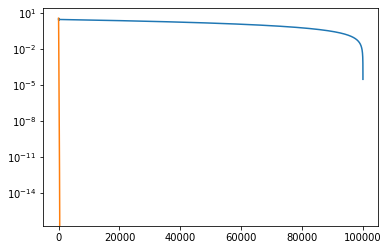

In [32]:
plt.plot(norm_list_kim)
plt.plot(norm_list_nes)
plt.yscale('log')

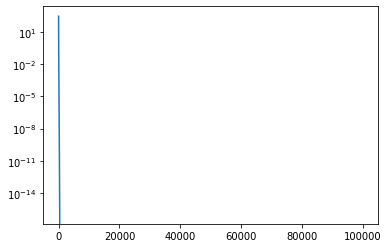

In [33]:
# plt.plot(norm_grad_kim)
plt.plot(norm_grad_nes)
plt.yscale('log')

In [34]:
norm_list_kim[-1]

2.8565082961343885e-05

In [35]:
def D_method(x_0, y_0, eta_x, eta_y, grad_x, grad_y, alpha, K, K_sub):
    x_list = [x_0]
    y_list = [y_0]
    
    x_0_up = x_0
    y_0_up = y_0
    
    x_up_cur = x_0_up
    y_up_cur = y_0_up
    
    x_cur = x_0
    y_cur = y_0
    
    for i in range(K):
        x_down = alpha*x_cur+(1-alpha)*x_up_cur
        y_down = alpha*y_cur+(1-alpha)*y_up_cur
        
        
        x_cur_sub = y_down
        x_prev_sub = y_down
        y_cur_sub = y_down
        
        for j in range(K_sub):
            y_cur_sub = x_cur_sub + (j/(j+2))*(x_cur_sub - x_prev_sub)
            x_upd_sub = y_cur_sub - (1/(L_y+1/(alpha*eta_y)))*(grad_y(x_down, y_cur_sub)\
                                                               +(1/(alpha*eta_y))*(y_cur_sub-y_down))
        

        
            x_prev_sub = x_cur_sub
            x_cur_sub = x_upd_sub
            
        y_up_upd = x_upd_sub
        
        
        
        
        
#         y_up_upd = solver(x_down, y_down, eta_y, alpha)
        
        x_up_upd = x_down - eta_x*alpha*grad_x(x_down, y_up_upd)
        x_upd = (x_cur + alpha*x_down - eta_x*grad_x(x_down,y_up_upd))/(1+alpha)
        y_upd = (y_cur+alpha*y_up_upd-eta_y*grad_y(x_down,y_up_upd))/(1+alpha)
        
        
        x_list.append(x_upd)
        y_list.append(y_upd)
        
        x_up_cur = x_up_upd
        y_up_cur = y_up_upd
        
        x_cur = x_upd
        y_cur = y_upd
        
    return x_list, y_list
        
        
        
    

In [36]:
x_0 = np.array([1,2])
y_0 = np.array([2,3])
L = 1000
L_x = 10
L_y = 1000
mu_x = 0.1
mu_y = 0.1
eta_x = 1/np.sqrt(mu_x*L_x)
eta_y = (1/mu_y)*(np.sqrt(mu_x/L_x))
alpha = np.sqrt(mu_x/L_x)
C = 2.
K_sub = int(np.sqrt(2*C)*max(1., np.sqrt(eta_y*alpha*L_y)))
K=10000


In [37]:
K_sub

20

In [38]:
A = np.array([[L_x,0,0,0],[0,mu_x,0,0],[0,0,L_y,0],[0,0,0,mu_y]])
b = np.array([2,1,3,1])

In [39]:
A

array([[1.e+01, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 1.e-01, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 1.e+03, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 1.e-01]])

In [40]:
def grad_quad_4(x):
    A = np.array([[L_x,0,0,0],[0,mu_x,0,0],[0,0,L_y,0],[0,0,0,mu_y]])
    b = np.array([2,1,3,1])
    return A@x+b

In [41]:
def grad_y(x,y):
    vec = np.array(list(x)+list(y))
    res = A@vec+b
    return res[2:4]

In [42]:
def grad_x(x,y):
    vec = np.array(list(x)+list(y))
    res = A@vec+b
    return res[0:2]

In [43]:
A

array([[1.e+01, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 1.e-01, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 1.e+03, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 1.e-01]])

In [44]:
x_star = np.linalg.solve(A,-b)

In [45]:
x_star

array([-2.e-01, -1.e+01, -3.e-03, -1.e+01])

In [46]:
K

10000

In [47]:
K_sub

20

In [48]:
x_list_D, y_list_D = D_method(x_0, y_0, eta_x, eta_y,grad_x, grad_y, alpha, 10000, 20)

In [49]:
print(x_list_D[-1])
print(y_list_D[-1])

[ -0.2 -10. ]
[-3.e-03 -1.e+01]


In [59]:
len(x_list_D)


10001

In [60]:
len(y_list_D)

10001

In [61]:
norm_list_D = []
for i in range(len(x_list_D)):
    norm_list_D.append(np.linalg.norm(np.array(list(x_list_D[i])+list(y_list_D[i])) - x_star))
    

In [62]:
norm_list_D_new = []
for i in range(len(x_list_D)):
    for k in range(K_sub+1):
        norm_list_D_new.append(np.linalg.norm(np.array(list(x_list_D[i])+list(y_list_D[i])) - x_star))
    

In [63]:
len(norm_list_D_new)

210021

In [64]:
np.array(list(x_list_D[-1])+list(y_list_D[-1])) 

array([-2.e-01, -1.e+01, -3.e-03, -1.e+01])

(-100.0, 50000.0)

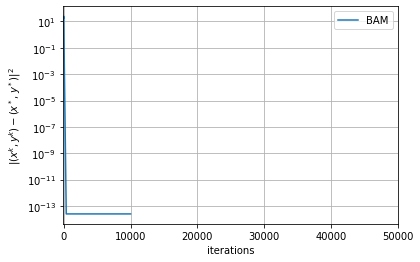

In [65]:
plt.plot(norm_list_D, label='BAM')
# plt.plot(norm_list_nes, label = 'NAG')
plt.legend()
plt.grid()
plt.ylabel('$\|(x^k,y^k) - (x^*,y^*)\|^2$')
plt.xlabel('iterations')
plt.yscale('log')
plt.xlim(-100,50000)
# plt.savefig('first_plot.pdf')

(1e-06, 50)

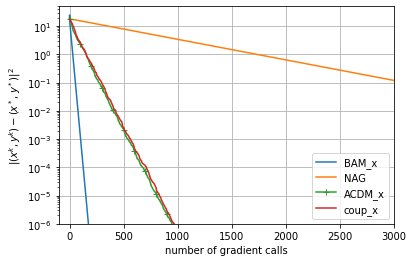

In [1283]:
# plt.plot(norm_list_D_new, label='BAM_y')
plt.plot(norm_list_D, label='BAM_x')
plt.plot(norm_list_nes, label = 'NAG')

# plt.plot(norm_list_ACRCD, label = 'ACRCD')
plt.plot(norm_list_stich_grad_x, label = 'ACDM_x',marker = '+', markevery = 100)


plt.plot(list_norm_coup_grad_x, label = 'coup_x')

plt.legend()
plt.grid()
plt.ylabel('$\|(x^k,y^k) - (x^*,y^*)\|^2$')
plt.xlabel('number of gradient calls')
plt.yscale('log')
plt.xlim(-100,3000)
plt.ylim(10**(-6),50)
# plt.savefig('prelim_plot.pdf')

(1e-06, 50)

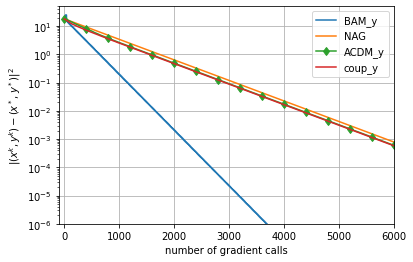

In [1287]:
plt.plot(norm_list_D_new, label='BAM_y')
plt.plot(norm_list_nes, label = 'NAG')
plt.plot(norm_list_stich_grad_y, label = 'ACDM_y',marker = 'd',markevery = 400)
plt.plot(list_norm_coup_grad_y, label = 'coup_y')
plt.legend()
plt.grid()
plt.ylabel('$\|(x^k,y^k) - (x^*,y^*)\|^2$')
plt.xlabel('number of gradient calls')
plt.yscale('log')
plt.xlim(-100,6000)
plt.ylim(10**(-6),50)

In [1174]:
norm_list_D[-1]

2.512147937263093e-14

In [1175]:
x_0_nes = np.array(list(x_0)+list(y_0)) 

In [1176]:
x_0_nes

array([1, 2, 2, 3])

In [1177]:
x_0

array([1, 2])

In [1178]:
y_0

array([2, 3])

In [1179]:
x_list_nes, y_list_nes = nesterov(x_0_nes, grad_quad_4, L,1, 100000)

In [1180]:
x_list_nes[-1]

array([-2.e-01, -1.e+01, -3.e-03, -1.e+01])

In [1181]:
x_star

array([-2.e-01, -1.e+01, -3.e-03, -1.e+01])

In [1182]:
norm_list_nes = []
for i in range(len(x_list_nes)):
    norm_list_nes.append(np.linalg.norm(x_list_nes[i] - x_star))

In [1183]:
x_0_nes

array([1, 2, 2, 3])

In [1184]:
A

array([[1.e+01, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 1.e-01, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 1.e+03, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 1.e-01]])

In [820]:
grad_quad_4(x_0_nes)

array([1.002e+03, 3.000e+00, 2.003e+03, 1.030e+00])

In [1185]:
norm_list_nes[-1]

1.256073974309895e-11

In [1186]:
np.linalg.norm(x_list_nes[-1] - x_star)

1.256073974309895e-11

In [50]:
def ACRCD(alpha, tau, theta, x_0, y_0, d, K):
    x_list = [x_0]
    y_list = [y_0]
    
    x_cur = x_0
    y_cur = y_0
    
    z_cur_x = x_0
    z_cur_y = y_0
    
    q_cur_x = x_0
    q_cur_y = y_0
    
    
    
    for i in range(K):
        
        x_upd = tau*z_cur_x+(1-tau)*q_cur_x
        y_upd = tau*z_cur_y+(1-tau)*q_cur_y
        
        index_p = np.random.choice([0,1],p=[0.5,0.5])
        if index_p == 0:
            q_upd_x = x_upd - (1/L_x)*grad_x(x_upd, y_upd)
            q_upd_y = q_cur_y
        
        if index_p == 1:
            q_upd_y = y_upd - (1/L_y)*grad_y(x_upd, y_upd)
            q_upd_x = q_cur_x
        
        if index_p == 0:
            z_upd_x = z_cur_x - (1/L_x)*alpha*n*grad_x(x_upd,y_upd)
            z_upd_y = z_cur_y
        
        if index_p == 1:
            z_upd_y = z_cur_y - (1/L_y)*alpha*n*grad_y(x_upd,y_upd)
            z_upd_x = z_cur_x
            
        
        
        x_list.append(x_upd)
        y_list.append(y_upd)
        
        x_cur = x_upd
        y_cur = y_upd
        
        z_cur_x = z_upd_x
        z_cur_y = z_upd_y
        
        q_cur_x = q_upd_x
        q_cur_y = q_upd_y
        
        
    return x_list, y_list
        
    
    
    
    

In [873]:
n=4

In [874]:

theta = np.linalg.norm(x_init - x_star)
alpha = (1/n)*np.sqrt(theta/d)

In [875]:
x_init = np.array(list(x_0)+list(y_0))
d = 1/2*(x_init.T@A@x_init+b.T@x_init)

In [876]:
tau = 1/(alpha*n*n+1)


In [909]:
x_list_ACRCD, y_list_ACRCD = ACRCD(alpha, tau, theta, x_0, y_0, d, 1000*K)

In [910]:
x_list_ACRCD[-1]

array([-0.002, -1.   ])

In [911]:
y_list_ACRCD[-1]

array([-3.00000000e-03, -9.99959023e+01])

In [912]:
x_star

array([-2.e-03, -1.e+00, -3.e-03, -1.e+02])

In [913]:
np.linalg.norm(np.array(list(x_list_ACRCD[-1])+list(y_list_ACRCD[-1])) - x_star)

0.004097736318357192

In [915]:
norm_list_ACRCD = []
for i in range(len(x_list_ACRCD)):
    norm_list_ACRCD.append(np.linalg.norm(np.array(list(x_list_ACRCD[i])+list(y_list_ACRCD[i])) - x_star))

In [863]:
1/2*(x_init.T@A@x_init+b.T@x_init)

2508.545

In [859]:
b.T@x_init

13

In [853]:
theta

103.06801644060101

In [848]:
np.random.choice([0,1],p=[0.5,0.5])

0

In [894]:
def ACDM(x_0, K, L_x, L_y, beta, grad_x, grad_y, mu):
    v_0 = x_0
    A_0 = 0
    B_0 = 1
    beta = 1./2
    
    B_cur = B_0
    A_cur = A_0
    
    p_x = np.sqrt(L_x)/(np.sqrt(L_x)+np.sqrt(L_y))
    p_y = np.sqrt(L_y)/(np.sqrt(L_x)+np.sqrt(L_y))
    S_b = (np.sqrt(L_x)+np.sqrt(L_y))
    
    x_cur = x_0
    v_cur = v_0
    x_list=[x_0]
    x_list_grad_x = [x_0]
    x_list_grad_y = [x_0]
    my_roots_list = []
    
    for i in range(K):
        coor_index = np.random.choice([0,1], p = [p_x,p_y])
        
        my_roots = np.roots([mu - S_b*S_b, B_cur+A_cur*mu, A_cur*B_cur])
        my_roots_list.append(my_roots)
        a_upd = max(my_roots)
        
        A_upd = A_cur + a_upd
        B_upd = B_cur + mu*a_upd
        
        alpha_cur = a_upd/A_upd
        beta_cur = mu*a_upd/B_upd
        
        y_cur = ((1-alpha_cur)*x_cur + alpha_cur*(1-beta_cur)*v_cur)/(1-alpha_cur*beta_cur)
        
        if coor_index == 0:
            
            x_upd = y_cur - (1/L_x)*grad_x(y_cur)
            v_upd = (1-beta_cur)*v_cur+beta_cur*y_cur-(a_upd/(B_upd*p_x))*grad_x(y_cur)
            x_list_grad_x.append(x_upd)
            
        if coor_index == 1:
            
            x_upd = y_cur - (1/L_y)*grad_y(y_cur)
            v_upd = (1-beta_cur)*v_cur+beta_cur*y_cur-(a_upd/(B_upd*p_y))*grad_y(y_cur)
            x_list_grad_y.append(x_upd)
            
        x_list.append(x_upd)
        
        x_cur = x_upd
        v_cur = v_upd
        A_cur = A_upd
        B_cur = B_upd
        
    return x_list, my_roots_list, x_list_grad_x, x_list_grad_y
            
        
    

In [1256]:
np.roots([2,3,1])

array([-1. , -0.5])

In [1257]:
def grad_y_full(x):
    vec = x
    res = A@vec+b
    true_res = res
    true_res[0:1] = 0
    return true_res

In [1258]:
def grad_x_full(x):
    vec = x
    res = A@vec+b
    true_res = res
    true_res[2:4] = 0
    return true_res

In [1620]:
x_0 = np.array([1,2])
y_0 = np.array([2,3])
L = 1000
L_x = 100
L_y = 1000
mu_x = 0.1
mu_y = 0.1
eta_x = 1/np.sqrt(mu_x*L_x)
eta_y = (1/mu_y)*(np.sqrt(mu_x/L_x))
alpha = np.sqrt(mu_x/L_x)
C = 1.
K_sub = int(np.sqrt(2*C)*max(1., np.sqrt(eta_y*alpha*L_y)))
K=10000



In [1621]:
x_init = np.array([1,2,2,3])

In [1261]:
x_list_stich, roots_stich, x_list_grad_x_stich, x_list_grad_y_stich = ACDM(x_init, 12000, L_x, L_y, 0.5, grad_x_full, grad_y_full)

In [1262]:
x_list_stich[-1]

array([-2.00000000e-01, -1.00000000e+01, -3.00000000e-03, -9.99999984e+00])

In [1263]:
x_star

array([-2.e-01, -1.e+01, -3.e-03, -1.e+01])

In [1264]:
len(roots_stich)

12000

In [1265]:
norm_list_stich = []
for i in range(len(x_list_stich)):
    norm_list_stich.append(np.linalg.norm(x_list_stich[i] - x_star))

In [1266]:
norm_list_stich[-1]

1.5564696198566708e-07

In [1268]:
norm_list_stich_grad_x = []
for i in range(len(x_list_grad_x_stich)):
    norm_list_stich_grad_x.append(np.linalg.norm(x_list_grad_x_stich[i] - x_star))

In [1269]:
norm_list_stich_grad_y = []
for i in range(len(x_list_grad_y_stich)):
    norm_list_stich_grad_y.append(np.linalg.norm(x_list_grad_y_stich[i] - x_star))

In [1267]:
len(x_list_grad_y_stich)

10944

In [1212]:
max(np.roots([2,2,1]))

(-0.4999999999999999+0.49999999999999994j)

In [1213]:
x_list_stich[-1]

array([-2.00000000e-01, -1.00000000e+01, -3.00000000e-03, -9.99999983e+00])

In [1214]:
x_star

array([-2.e-01, -1.e+01, -3.e-03, -1.e+01])

In [1215]:
A

array([[1.e+01, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 1.e-01, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 1.e+03, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 1.e-01]])

In [52]:
def linear_coupling(x_0, grad_x, grad_y, L_x, L_y, mu, K):

    S_alpha = np.sqrt(L_x)+np.sqrt(L_y)
    p_x = np.sqrt(L_x)/S_alpha
    p_y = np.sqrt(L_y)/S_alpha
    tau = 2/(1+np.sqrt((4*S_alpha*S_alpha/mu)+1))
    eta = 1/(tau*S_alpha*S_alpha)
    y_0 = x_0
    z_0 = x_0
    list_y = [y_0]
    y_list_grad_x = [y_0]
    y_list_grad_y = [y_0]
    x_cur = x_0
    y_cur = y_0
    z_cur = z_0
    
    for i in range(K):
        x_upd = tau*z_cur + (1-tau)*y_cur
        index_coor = np.random.choice([0,1],p = [p_x, p_y])
        
        if index_coor == 0:
            
            y_upd = x_upd - (1/L_x)*grad_x(x_upd)
            z_upd = (1/(1 + eta * mu))*(z_cur + eta*mu*x_upd - (eta/p_x)*grad_x(x_upd))
            
            
            y_list_grad_x.append(y_upd)
            
        if index_coor == 1:
            
            y_upd = x_upd - (1/L_y)*grad_y(x_upd)
            z_upd = (1/(1 + eta * mu))*(z_cur + eta*mu*x_upd - (eta/p_y)*grad_y(x_upd))
            
            
            y_list_grad_y.append(y_upd)
            
        list_y.append(y_upd)
        
        x_cur = x_upd
        y_cur = y_upd
        z_cur = z_upd
        
        
    return list_y, y_list_grad_x, y_list_grad_y
            
            
            
            
            

In [1227]:
L_x

10

In [1228]:
L_y

1000

In [1247]:
list_y_coupling, y_list_grad_x_coup, y_list_grad_y_coup = linear_coupling(x_init, grad_x_full, grad_y_full, L_x, L_y, 100000)

In [1248]:
list_y_coupling[-1]

array([-2.e-01, -1.e+01, -3.e-03, -1.e+01])

In [1249]:
x_star

array([-2.e-01, -1.e+01, -3.e-03, -1.e+01])

In [1250]:
list_norm_coup = []
for i in range(len(list_y_coupling)):
    list_norm_coup.append(np.linalg.norm(list_y_coupling[i] - x_star))

In [1251]:
list_norm_coup[-1]

1.3420843221172923e-12

In [1252]:
list_norm_coup_grad_x = []
for i in range(len(y_list_grad_x_coup)):
    list_norm_coup_grad_x.append(np.linalg.norm(y_list_grad_x_coup[i] - x_star))

In [1253]:
list_norm_coup_grad_y = []
for i in range(len(y_list_grad_y_coup)):
    list_norm_coup_grad_y.append(np.linalg.norm(y_list_grad_y_coup[i] - x_star))

In [1237]:
len(list_norm_coup_grad_x)

9036

In [1238]:
len(list_norm_coup_grad_y)

90966

In [1243]:
len(list_norm_coup_grad_y)

90966

In [1240]:
len(y_list_grad_x_coup)

9036

In [1242]:
y_list_grad_x_coup

[array([1, 2, 2, 3]),
 array([-0.2       ,  1.82072126, -0.003     ,  2.93513269]),
 array([-0.2       ,  1.63962181, -0.003     ,  2.89473357]),
 array([-0.2       ,  1.45780485, -0.003     ,  2.86206566]),
 array([-0.2       ,  1.2366182 , -0.003     ,  2.81513236]),
 array([-0.2       ,  0.89213891, -0.003     ,  2.70702895]),
 array([-0.2       ,  0.46990654, -0.003     ,  2.53502947]),
 array([-0.2       , -0.33251799, -0.003     ,  1.99216571]),
 array([-0.2       , -0.45184471, -0.003     ,  1.9752161 ]),
 array([-0.2       , -0.75288418, -0.003     ,  1.83571842]),
 array([-0.2       , -0.97769459, -0.003     ,  1.75080512]),
 array([-0.2       , -1.20593069, -0.003     ,  1.66799286]),
 array([-0.2       , -1.62672021, -0.003     ,  1.44940931]),
 array([-0.2       , -1.96114004, -0.003     ,  1.26325073]),
 array([-0.2       , -2.57199525, -0.003     ,  0.76396232]),
 array([-0.2       , -2.69959965, -0.003     ,  0.71498468]),
 array([-0.2       , -2.94500611, -0.003     ,  

In [1246]:
list_norm_coup_grad_y[-1]

9.002177736525761

# Large experiment

In [549]:
L_x = 50
L_y = 500
mu = 0.1
eta_x = 1/np.sqrt(mu_x*L_x)
eta_y = (1/mu_y)*(np.sqrt(mu_x/L_x))
alpha = np.sqrt(mu_x/L_x)
C = 1
K_sub = int(np.sqrt(2*C)*max(1., np.sqrt(eta_y*alpha*L_y)))
K=10000

In [550]:
K_sub

4

In [551]:
d_x = 100
d_y = 10

In [552]:
import scipy as sp
from scipy import stats


In [553]:
# diag_x = stats.truncnorm.rvs(mu,L_x, size = d_x)

In [554]:
diag_x = np.sort(np.random.uniform(low=mu, high=L_x, size=d_x))

In [555]:
diag_x_new = diag_x[::-1]

In [556]:
diag_x_new[0] = L_x

In [557]:
diag_x_new[-1] = mu

In [558]:
diag_x_new

array([50.        , 48.7938481 , 48.77071374, 48.67510183, 48.36480821,
       48.16148313, 47.43781238, 46.22094825, 45.89240021, 44.48358822,
       44.30780771, 44.03727873, 43.59961311, 43.31064923, 43.14857296,
       42.97438853, 42.05764781, 41.77286838, 40.98561158, 40.87033025,
       40.53215092, 39.34096412, 38.6356969 , 38.48783664, 37.88438067,
       37.81571118, 37.67915918, 37.48481092, 37.07531418, 36.42196753,
       35.11548319, 34.83914984, 34.83403963, 34.73615442, 34.72748887,
       34.70160286, 33.83247795, 33.43079852, 33.32376264, 33.07083642,
       32.88309073, 30.15019034, 29.91067481, 29.82741214, 29.47511733,
       28.80790568, 28.27191313, 28.02270568, 27.9344225 , 27.45203375,
       26.43611487, 26.36128777, 25.02972255, 24.8273186 , 24.58242222,
       23.71005781, 23.05106844, 22.02834874, 21.8614167 , 21.04241752,
       20.96334737, 20.86604737, 20.78270777, 20.72141859, 20.2431712 ,
       19.75458717, 19.7388166 , 19.52956086, 19.33364517, 19.23

In [559]:
diag_y = np.sort(np.random.uniform(low=mu, high=L_y, size=d_y))

In [560]:
# diag_y = stats.truncnorm.rvs(mu,L_y, size = d_y)

In [561]:
diag_y_new = diag_y[::-1]

In [562]:
diag_y_new[0] = L_y
diag_y_new[-1] = mu

In [563]:
diag_y_new

array([5.00000000e+02, 3.37917782e+02, 3.23988429e+02, 2.77677731e+02,
       2.65141207e+02, 2.37457884e+02, 2.36745604e+02, 2.12149961e+02,
       1.89345357e+02, 1.00000000e-01])

In [564]:
diag_full = np.array( list(diag_x_new) + list(diag_y_new) )

In [565]:
A_full = np.diag(diag_full)

In [566]:
b = np.random.uniform(low=1, high=10, size=(d_y+d_x))

In [567]:
def quad_function(x):
    res = 0.5*(x.T@A_full@x) - b@x
    return res

In [568]:
quad_function(np.ones(d_y+d_x))

1994.4372030419736

In [569]:
x_star = np.linalg.solve(A_full,b)

In [570]:
quad_function(x_star)

-482.64172180516664

In [571]:
def grad_x_new(x,y):
    vec = np.array(list(x)+list(y))
    grad = A_full@vec - b
    return grad[0:d_x]

In [572]:
def grad_x_new_full(x):
    grad = A_full@x - b
    grad[d_x:(d_y+d_x)] = 0.
    return grad

In [573]:
def grad_y_new(x,y):
    vec = np.array(list(x)+list(y))
    grad = A_full@vec - b
    return grad[d_x:(d_y+d_x)]

In [574]:
def grad_y_new_full(x):
    grad = A_full@x - b
    grad[0:d_x] = 0.
    return grad

In [575]:
def grad_new(x):
    grad = A_full@x - b
    return grad


In [576]:
x_0 = np.zeros(d_x)
y_0 = np.zeros(d_y)

In [456]:
x_list_large_D, y_list_large_D = D_method(x_0,y_0,eta_x,eta_y,grad_x_new, grad_y_new, alpha,K,K_sub)

KeyboardInterrupt: 

In [276]:
quad_function(np.array(list(x_list_large_D[-1])+list(y_list_large_D[-1])))

-857.0345038516891

In [277]:
func_list_large_D_x = []
for i in range(len(x_list_large_D)):
    func_list_large_D_x.append(quad_function(np.array(list(x_list_large_D[i])+list(y_list_large_D[i]))) - quad_function(x_star))

In [278]:
func_list_large_D_y = []
for i in range(len(x_list_large_D)):
    for j in range(K_sub):
        func_list_large_D_y.append(quad_function(np.array(list(x_list_large_D[i])+list(y_list_large_D[i]))) - quad_function(x_star))

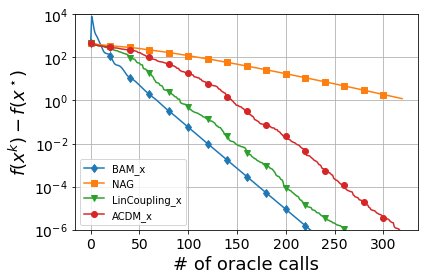

In [596]:
# plt.plot(func_list_large_D_x[0:250],label = 'BAM_x')
plt.plot(func_list_large_D_2_x[0:320],label = 'BAM_x',marker = 'd', markevery = 20)
# plt.plot(func_list_large_D_y[0:4000],label = 'BAM_y')
# plt.plot(func_list_large_D_2_y[0:4000],label = 'BAM_y')
plt.plot(func_list_large_Nes_x[0:320], label = 'NAG',marker = 's', markevery = 20)
plt.plot(func_list_large_coup_x[0:320], label = 'LinCoupling_x',marker = 'v', markevery = 20)
plt.plot(func_list_large_ACDM_x[0:320], label = 'ACDM_x',marker = 'o', markevery = 20)
plt.grid()
plt.xlabel('# of oracle calls',fontsize=18)
plt.ylabel('$f(x^k) - f(x^\star)$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.ylim(10**(-6),10**4)
plt.yscale('log')
plt.tight_layout()
plt.savefig('10_100_x_E1_50_500.pdf')

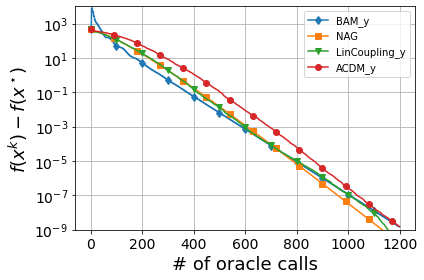

In [600]:
# plt.plot(func_list_large_D_x[0:4000],label = 'BAM_x')
# plt.plot(func_list_large_D_2_x[0:2000],label = 'BAM_x',marker = 'd', markevery = 100)
# plt.plot(func_list_large_D_y[0:4000],label = 'BAM_y')
plt.plot(func_list_large_D_2_y[0:1200],label = 'BAM_y',marker = 'd', markevery = 100)
plt.plot(func_list_large_Nes_x[0:1200], label = 'NAG',marker = 's', markevery = 90)
plt.plot(func_list_large_coup_y[0:1200], label = 'LinCoupling_y',marker = 'v', markevery = 100)
plt.plot(func_list_large_ACDM_y[0:1200], label = 'ACDM_y',marker = 'o', markevery = 90)
plt.grid()
plt.xlabel('# of oracle calls',fontsize=18)
plt.ylabel('$f(x^k) - f(x^\star)$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.ylim(10**(-9),10**4)
plt.yscale('log')
plt.tight_layout()
plt.savefig('10_100_y_E1_50_500.pdf')

In [577]:
x_init = np.array(list(x_0)+list(y_0))

In [578]:
x_list_large_Nes, y_list_large_Nes = nesterov(x_init, grad_new, L_y,mu,K)

In [579]:
func_list_large_Nes_x = []
for i in range(len(x_list_large_Nes)):
    func_list_large_Nes_x.append(quad_function(x_list_large_Nes[i]) - quad_function(x_star))

In [580]:
def D_method_2(x_0, y_0, eta_x, eta_y, grad_x, grad_y, alpha, K, K_sub):
    x_list = [x_0]
    y_list = [y_0]
    
    x_0_up = x_0
    y_0_up = y_0
    
    x_up_cur = x_0_up
    y_up_cur = y_0_up
    
    x_cur = x_0
    y_cur = y_0
    
    for i in range(K):
        x_down = alpha*x_cur+(1-alpha)*x_up_cur
        y_down = alpha*y_cur+(1-alpha)*y_up_cur
        
        
        x_cur_sub = y_down
        x_prev_sub = y_down
        y_cur_sub = y_down
        
        for j in range(K_sub//2):
            y_cur_sub = x_cur_sub + (j/(j+2))*(x_cur_sub - x_prev_sub)
            x_upd_sub = y_cur_sub - (1/(L_y+1/(alpha*eta_y)))*(grad_y(x_down, y_cur_sub)\
                                                               +(1/(alpha*eta_y))*(y_cur_sub-y_down))
        

        
            x_prev_sub = x_cur_sub
            x_cur_sub = x_upd_sub
            
        y_up_upd = x_upd_sub
        
        x_cur_kim = y_up_upd
        y_cur_kim = y_up_upd
        theta = init_theta(K_sub//2)
        for k in range(K_sub//2):
            y_upd_kim = x_cur_kim - (1/L_y)*grad_y(x_cur_kim)
            
            x_upd_kim = y_upd_kim + (theta[i]-1)*(2*theta[i+1]-1)/(theta[i]*(2*theta[i]-1))*(y_upd_kim - y_cur_kim)\
            + (2*theta[i+1]-1)/(2*theta[i]-1)*(y_upd_kim - x_cur_kim)
            
            y_cur_kim = y_upd_kim
            x_cur_kim = x_upd_kim
            
        y_up_upd = x_upd_kim
        
            
            
            
        
        
        
        
        
#         y_up_upd = solver(x_down, y_down, eta_y, alpha)
        
        x_up_upd = x_down - eta_x*alpha*grad_x(x_down, y_up_upd)
        x_upd = (x_cur + alpha*x_down - eta_x*grad_x(x_down,y_up_upd))/(1+alpha)
        y_upd = (y_cur+alpha*y_up_upd-eta_y*grad_y(x_down,y_up_upd))/(1+alpha)
        
        
        x_list.append(x_upd)
        y_list.append(y_upd)
        
        x_up_cur = x_up_upd
        y_up_cur = y_up_upd
        
        x_cur = x_upd
        y_cur = y_upd
        
    return x_list, y_list
        
        
        
    

In [581]:
K_sub 

4

In [582]:
x_list_large_D_2, y_list_large_D_2 = D_method(x_0,y_0,eta_x,eta_y,grad_x_new, grad_y_new, alpha,K,K_sub)

In [583]:
quad_function(np.array(list(x_list_large_D_2[-1])+list(y_list_large_D_2[-1])))

-482.64172180516675

In [584]:
x_list_large_D_2[-1][0]

0.08469819349073268

In [585]:
x_list_large_D[-1][0]

0.17288224145308081

In [586]:
func_list_large_D_2_x = []
for i in range(len(x_list_large_D_2)):
    func_list_large_D_2_x.append(quad_function(np.array(list(x_list_large_D_2[i])+list(y_list_large_D_2[i]))) - quad_function(x_star))

In [587]:
func_list_large_D_2_y = []
for i in range(len(x_list_large_D_2)):
    for j in range(K_sub):
        func_list_large_D_2_y.append(quad_function(np.array(list(x_list_large_D_2[i])+list(y_list_large_D_2[i]))) - quad_function(x_star))

In [588]:
x_list_large_lin_coup, x_list_large_grad_x_lin_coup, x_list_large_grad_y_lin_coup = linear_coupling(x_init, grad_x_new_full, grad_y_new_full, L_x, L_y, mu, K)

In [589]:
func_list_large_coup_x = []
for i in range(len(x_list_large_grad_x_lin_coup)):
    func_list_large_coup_x.append(quad_function(x_list_large_grad_x_lin_coup[i]) - quad_function(x_star))

In [590]:
func_list_large_coup_y = []
for i in range(len(x_list_large_grad_y_lin_coup)):
    func_list_large_coup_y.append(quad_function(x_list_large_grad_y_lin_coup[i]) - quad_function(x_star))

In [591]:
x_list_large_ACDM, my_roots, x_list_large_grad_x_ACDM, x_list_large_grad_y_ACDM = ACDM(x_init, K, L_x, L_y, 0.5, grad_x_new_full, grad_y_new_full)

In [592]:
func_list_large_ACDM_x = []
for i in range(len(x_list_large_grad_x_ACDM)):
    func_list_large_ACDM_x.append(quad_function(x_list_large_grad_x_ACDM[i]) - quad_function(x_star))

In [593]:
func_list_large_ACDM_y = []
for i in range(len(x_list_large_grad_y_ACDM)):
    func_list_large_ACDM_y.append(quad_function(x_list_large_grad_y_ACDM[i]) - quad_function(x_star))

## Distance

In [1559]:
dist_list_large_ACDM_x = []
for i in range(len(x_list_large_grad_x_ACDM)):
    dist_list_large_ACDM_x.append(np.linalg.norm(x_list_large_grad_x_ACDM[i] - x_star)**2)

In [1560]:
dist_list_large_ACDM_y = []
for i in range(len(x_list_large_grad_y_ACDM)):
    dist_list_large_ACDM_y.append(np.linalg.norm(x_list_large_grad_y_ACDM[i] - x_star)**2)

In [1561]:
dist_list_large_coup_x = []
for i in range(len(x_list_large_grad_x_lin_coup)):
    dist_list_large_coup_x.append(np.linalg.norm(x_list_large_grad_x_lin_coup[i] - x_star)**2)

In [1563]:
dist_list_large_coup_y = []
for i in range(len(x_list_large_grad_y_lin_coup)):
    dist_list_large_coup_y.append(np.linalg.norm(x_list_large_grad_y_lin_coup[i] - x_star)**2)

In [1564]:
dist_list_large_D_2_x = []
for i in range(len(x_list_large_D_2)):
    dist_list_large_D_2_x.append(np.linalg.norm(np.array(list(x_list_large_D_2[i])+list(y_list_large_D_2[i])) - x_star))

In [1565]:
dist_list_large_D_2_y = []
for i in range(len(x_list_large_D_2)):
    for j in range(K_sub):
        dist_list_large_D_2_y.append(np.linalg.norm(np.array(list(x_list_large_D_2[i])+list(y_list_large_D_2[i])) - x_star))

In [1566]:
dist_list_large_Nes_x = []
for i in range(len(x_list_large_Nes)):
    dist_list_large_Nes_x.append(np.linalg.norm(x_list_large_Nes[i] - x_star))

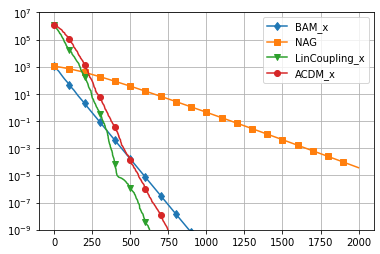

## Log-regression 

In [797]:
import matplotlib
import numpy as np
import psutil
import ray
import seaborn as sns
import copy

import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy.sparse import csc_matrix, csr_matrix
from sklearn.datasets import load_svmlight_file, fetch_rcv1

from optmethods.datasets import get_dataset
from optmethods.first_order import Adgd, Gd, Nesterov, RestNest
from optmethods.loss import LogisticRegression
from optmethods.utils import get_trace, relative_round

In [798]:
import sklearn.datasets
import urllib.request
# bs = 1
# w8a_url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/w8a"
a1a_url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a"
data_path = './a1a'
# f = urllib.request.urlretrieve(w8a_url, data_path)
f = urllib.request.urlretrieve(a1a_url, data_path)
A, b = sklearn.datasets.load_svmlight_file(data_path)

n, dim = A.shape  # \# of data and dimension for each data: 49749, 300
print(n, dim)
# if n % num_cpus != 0:
#     A = A[:n - (n % num_cpus)]
#     b = b[:n - (n % num_cpus)]

A = A.toarray()
l1 = 0
loss = LogisticRegression(A, b, l1=l1, l2=0)
# n, dim = A.shape
# if n <= 20000 or dim <= 20000:
#     print('Computing the smoothness constant via SVD, it may take a few minutes...')
L = loss.smoothness
# L_batch = loss.batch_smoothness(bs)
# L_max = loss.max_smoothness
# # l2 = 0
# l2 = 1e-4 * L       # here we choose the regularizer to be 1e-5, in paper 1e-4
# loss.l2 = l2

1605 119


In [800]:
b_unique = np.unique(b)
if (b_unique == [1, 2]).all():
    # Transform labels {1, 2} to {0, 1}
    b = b - 1
elif (b_unique == [-1, 1]).all():
    # Transform labels {-1, 1} to {0, 1}
    b = (b+1) / 2
else:
    # replace class labels with 0's and 1's
    b = 1. * (b == b[0])

In [801]:
# from sklearn.datasets import make_classification

In [802]:
# np.random.seed(42)
# n = 1000
# d = 110

# A, b = make_classification(n_samples = n, n_features=d, n_redundant=0, n_informative=3, n_clusters_per_class=1)

In [803]:
b = 2*b-1

In [804]:
np.unique(b)

array([-1.,  1.])

In [736]:
# L_max = 0
# mu = 0.1
# for j in range(n):
#     q = A[j].T @ A[j]
#     L_i = (q**2)/4 + mu
#     if L_max < L_i:
#         L_max = L_i

In [737]:
# L_max

7171.155269050156

In [805]:
d_x = 100
d_y = dim - d_x

In [806]:
L

1.567157518045339

In [807]:
d_y

19

In [1080]:
mu_x = 0.01
mu_y = 0.002

In [1081]:
dim 

119

In [1082]:
import copy

In [1083]:
def func(x, i, A, b, mu_x, mu_y): 
    return np.log(1+np.exp(-b[i]*(A[i].T @ x))) + mu_x/2 * x[0:d_x].T @ x[0:d_x]+ mu_y/2 * x[d_x:dim].T@x[d_x:dim]

def nabla_func(x, i, A, b, mu_x, mu_y):
    vec_x = copy.deepcopy(x)
    vec_x[d_x:dim] = 0
    vec_y = copy.deepcopy(x)
    vec_y[0:d_x] = 0
#     print(x)
#     print(vec_x)
#     print(vec_y)
    return mu_x*vec_x+mu_y*vec_y - 1/(1 + np.exp(b[i]*(A[i].T @ x))) *b[i] * A[i]

def Func(x):
    s = 0
    for i in range(n):
        s += func(x, i, A, b, mu_x, mu_y)
    return s/n

def nabla_Func(x):
    s = np.zeros(dim)
    for i in range(n):
        s += nabla_func(x, i, A, b, mu_x, mu_y)
    return s/n

In [1084]:
x = np.ones(dim)

In [1085]:
x[0:d_x].T@x[0:d_x]

100.0

In [1086]:
x[d_x:dim].T@x[d_x:dim]

19.0

In [1087]:
Func(np.ones(dim))

10.949530767067627

In [1088]:
def nabla_Func_x(x,y):
    vec = np.array(list(x)+list(y))
    s = np.zeros(dim)
    for i in range(n):
        s += nabla_func(vec, i, A, b, mu_x, mu_y)
    res = s/n
    return res[0:d_x]

In [1089]:
def nabla_Func_y(x,y):
    vec = np.array(list(x)+list(y))
    s = np.zeros(dim)
    for i in range(n):
        s += nabla_func(vec, i, A, b, mu_x, mu_y)
    res = s/n
    return res[d_x:dim]

In [1090]:
def nabla_Func_y_full(x):
    s = np.zeros(dim)
    for i in range(n):
        s += nabla_func(x, i, A, b, mu_x, mu_y)
    res = s/n
    res[0:d_x] = 0
    return mu_x/mu_y*res

In [1091]:
nabla_Func_y_full(np.ones(dim))[d_x:dim]

array([0.01623052, 0.01934577, 0.09722734, 0.01      , 0.01311526,
       0.01311526, 0.01934579, 0.01311526, 0.01311526, 0.01934578,
       0.01      , 0.01623052, 0.01311526, 0.02869157, 0.01311526,
       0.01      , 0.01623052, 0.01      , 0.0349221 ])

In [1092]:
def nabla_Func_x_full(x):
    s = np.zeros(dim)
    for i in range(n):
        s += nabla_func(x, i, A, b, mu_x, mu_y)
    res = s/n
    res[d_x:dim] = 0
    return res

In [1093]:
nabla_Func_x_full(np.ones(dim))[0:d_x]

array([0.19878477, 0.17386273, 0.15579419, 0.12464156, 0.15080966,
       0.53959444, 0.07043606, 0.02682239, 0.02246104, 0.05610586,
       0.04364482, 0.01      , 0.01062305, 0.16077859, 0.15766332,
       0.15890943, 0.16700911, 0.15953246, 0.10470388, 0.19006205,
       0.0448909 , 0.28725817, 0.0137383 , 0.03803735, 0.03242986,
       0.0255763 , 0.02993767, 0.01872273, 0.03118376, 0.01436136,
       0.03242987, 0.0124922 , 0.02495325, 0.01311526, 0.13398735,
       0.28725817, 0.19006205, 0.06046721, 0.13211813, 0.26981257,
       0.12277245, 0.32339522, 0.03741429, 0.03803735, 0.02183798,
       0.01062305, 0.02993767, 0.10470395, 0.10532702, 0.09535815,
       0.06482856, 0.08601235, 0.04676009, 0.06109029, 0.09847343,
       0.03928346, 0.05735198, 0.01436137, 0.02557631, 0.01      ,
       0.03367595, 0.15205585, 0.2411522 , 0.24925204, 0.04364482,
       0.09411204, 0.64364387, 0.03180682, 0.02495325, 0.01373831,
       0.08975065, 0.28975039, 0.48414252, 0.72962508, 0.04426

In [1094]:
L_x = L
L_y = L
mu_x = 0.01
mu_y = 0.002
eta_x = 1/np.sqrt(mu_x*L_x)
eta_y = (1/mu_y)*(np.sqrt(mu_x/L_x))
alpha = np.sqrt(mu_x/L_x)
C = 1
K_sub = int(np.sqrt(2*C)*max(1., np.sqrt(eta_y*alpha*L_y)))
K=10000

In [1095]:
K_sub

3

In [1096]:
x_0 = np.zeros(d_x)
y_0 = np.zeros(dim-d_x)

In [1097]:
x_init = np.array(list(x_0)+list(y_0))

In [1099]:
K=2000

In [1100]:
x_list_large_Nes, y_list_large_Nes = nesterov(x_init, nabla_Func, L_y,mu_y,K)

In [1101]:
# nabla_Func(x_list_large_Nes[2]) 

In [1010]:
dist_list_large_Nes_x = []
for i in range(len(x_list_large_Nes)):
    dist_list_large_Nes_x.append(np.linalg.norm(x_list_large_Nes[i] - x_list_large_Nes[-1])**2)

In [1102]:
func_list_large_Nes_x = []
for i in range(len(x_list_large_Nes)):
    func_list_large_Nes_x.append(Func(x_list_large_Nes[i]) - Func(x_list_large_Nes[-1]))

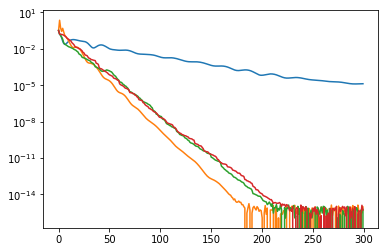

In [898]:
plt.plot(func_list_large_Nes_x[0:300])
plt.plot(func_list_large_D_2_x[0:300])
# plt.plot(func_list_large_D_2_y[0:300])
plt.plot(func_list_large_coup_x[0:300])
plt.plot(func_list_large_ACDM_x[0:300])
plt.yscale('log')

In [712]:
func_list_large_Nes_x[0]

0.15693407225951106

In [796]:
a_a = nabla_func(np.ones(dim), 1, A, b, mu_x, mu_y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.

In [788]:
b_b = nabla_func(np.zeros(dim)*2, 1, A, b, mu_x, mu_y)

In [784]:
a_a

array([-0.3405897 ,  1.11288559, -0.02328927, -0.23335725, -1.00424222,
        1.4854676 ,  0.25283585,  0.41944524, -0.31187712,  0.90265403,
        0.19547436,  0.41324034,  0.62415922, -0.3504869 ,  0.10062047,
       -0.18288421, -0.19498324,  0.92029146,  0.28011724,  0.06336012,
        0.35373044,  0.76695829,  0.17609837,  0.54895238, -0.28581234,
        0.22256567,  0.6650391 ,  0.0574466 , -0.24763989, -0.01596344,
        0.6416675 , -0.43054525,  0.22996761, -0.01447422, -0.293312  ,
       -0.61989027, -0.41891466,  0.22771315,  0.16701101,  0.38833251,
       -0.16418011,  0.68046533, -0.01955365, -0.57631044, -0.34058061,
        0.46037372,  0.11921801, -0.22998171,  0.04989315, -0.64485965,
       -0.24042688,  0.63277441, -0.02261923, -0.05109069, -0.59898731,
       -0.20345291,  0.42524838, -0.14318189, -0.17352701,  0.49539597,
        0.39644001, -0.47806451, -0.3433977 , -0.35009516,  0.10221685,
       -0.43971803, -0.25624133, -0.17740556, -0.47153644,  0.44

In [789]:
b_b

array([-0.3405897 ,  1.11288559, -0.02328927, -0.23335725, -1.00424222,
        1.4854676 ,  0.25283585,  0.41944524, -0.31187712,  0.90265403,
        0.19547436,  0.41324034,  0.62415922, -0.3504869 ,  0.10062047,
       -0.18288421, -0.19498324,  0.92029146,  0.28011724,  0.06336012,
        0.35373044,  0.76695829,  0.17609837,  0.54895238, -0.28581234,
        0.22256567,  0.6650391 ,  0.0574466 , -0.24763989, -0.01596344,
        0.6416675 , -0.43054525,  0.22996761, -0.01447422, -0.293312  ,
       -0.61989027, -0.41891466,  0.22771315,  0.16701101,  0.38833251,
       -0.16418011,  0.68046533, -0.01955365, -0.57631044, -0.34058061,
        0.46037372,  0.11921801, -0.22998171,  0.04989315, -0.64485965,
       -0.24042688,  0.63277441, -0.02261923, -0.05109069, -0.59898731,
       -0.20345291,  0.42524838, -0.14318189, -0.17352701,  0.49539597,
        0.39644001, -0.47806451, -0.3433977 , -0.35009516,  0.10221685,
       -0.43971803, -0.25624133, -0.17740556, -0.47153644,  0.44

In [787]:
b_b

array([ 0.22190704,  0.47348441,  0.42638692,  0.45967525, -0.57621671,
        0.0196707 , -0.21197556, -0.26469819, -0.20647436, -0.39682769,
        0.01166377, -0.15762562,  1.16830835, -0.07845375,  0.26748928,
        0.41222045,  0.6808226 , -0.03105697, -0.62341665,  0.25831901,
        1.23731867,  0.64000458,  0.14531259, -0.48185666, -0.2759261 ,
       -0.57132918, -0.89286282, -0.10975393, -0.25100237,  0.03807151,
       -0.87366025,  0.47638262,  0.12891207,  0.17281052, -0.47055379,
        0.25750321, -0.0224942 ,  0.69164946,  0.61462058, -0.43245521,
       -0.58801459,  0.22495923, -0.79987279,  0.05620287, -0.24777664,
        0.37442925, -0.45451239,  0.46684307,  0.12889614,  0.7402705 ,
        0.38542668,  1.2965222 , -0.11352091, -0.07634518, -0.17814799,
        0.53051332,  0.25109539, -0.25159448, -0.48142709, -0.50951847,
        0.02013009,  0.03818505, -0.38906002, -0.65379172,  0.58773513,
        0.32961423, -0.37857384, -0.14609201,  0.06790597,  0.85

In [902]:
mu_x

0.01

In [1103]:
L_x = L
L_y = L

eta_x = 1/np.sqrt(mu_x*L_x)
eta_y = (1/mu_y)*(np.sqrt(mu_x/L_x))
alpha = np.sqrt(mu_x/L_x)
C = 1
K_sub = int(np.sqrt(2*C)*max(1., np.sqrt(eta_y*alpha*L_y)))
K=2000

In [1104]:
K_sub

3

In [1105]:
K_sub = 2

In [845]:
y_0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [1106]:
x_list_large_D_2, y_list_large_D_2 = D_method(x_0,y_0,eta_x,eta_y,nabla_Func_x, nabla_Func_y, alpha,K,K_sub)

In [1107]:
func_list_large_D_2_x = []
for i in range(len(x_list_large_D_2)):
    func_list_large_D_2_x.append(Func(np.array(list(x_list_large_D_2[i])+list(y_list_large_D_2[i]))) - Func(x_list_large_Nes[-1]))

In [855]:
func_list_large_D_2_y = []
for i in range(len(x_list_large_D_2)):
    for j in range(K_sub):
        func_list_large_D_2_y.append(Func(np.array(list(x_list_large_D_2[i])+list(y_list_large_D_2[i]))) - Func(x_list_large_Nes[-1]))

KeyboardInterrupt: 

In [1108]:
func_list_large_D_2_y = []

In [1109]:
for i in range(len(x_list_large_D_2)):
    func_list_large_D_2_y+=([func_list_large_D_2_x[i]]*K_sub)

In [1036]:
len(func_list_large_D_2_y)

150015

In [867]:
a+=a+([1]*2)

In [874]:
L_y

1.567157518045339

In [1110]:
x_list_large_lin_coup, x_list_large_grad_x_lin_coup, x_list_large_grad_y_lin_coup = linear_coupling(x_init, nabla_Func_x_full, nabla_Func_y_full, L_x, (mu_x/mu_y)*L_y, mu_x, K)

In [1111]:
func_list_large_coup_x = []
for i in range(len(x_list_large_grad_x_lin_coup)):
    func_list_large_coup_x.append(Func(x_list_large_grad_x_lin_coup[i]) - Func(x_list_large_Nes[-1]))

In [1112]:
func_list_large_coup_y = []
for i in range(len(x_list_large_grad_y_lin_coup)):
    func_list_large_coup_y.append(Func(x_list_large_grad_y_lin_coup[i]) - Func(x_list_large_Nes[-1]))

In [1113]:
x_list_large_ACDM, my_roots, x_list_large_grad_x_ACDM, x_list_large_grad_y_ACDM = ACDM(x_init, K, L_x, (mu_x/mu_y)*L_y, 0.5, nabla_Func_x_full, nabla_Func_y_full,mu_x)

In [1114]:
func_list_large_ACDM_x = []
for i in range(len(x_list_large_grad_x_ACDM)):
    func_list_large_ACDM_x.append(Func(x_list_large_grad_x_ACDM[i]) - Func(x_list_large_Nes[-1]))

In [1115]:
func_list_large_ACDM_y = []
for i in range(len(x_list_large_grad_y_ACDM)):
    func_list_large_ACDM_y.append(Func(x_list_large_grad_y_ACDM[i]) - Func(x_list_large_Nes[-1]))

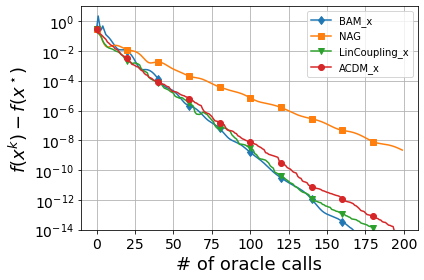

In [1119]:
# plt.plot(func_list_large_D_x[0:250],label = 'BAM_x')
plt.plot(func_list_large_D_2_x[0:200],label = 'BAM_x',marker = 'd', markevery = 20)
# plt.plot(func_list_large_D_y[0:4000],label = 'BAM_y')
# plt.plot(func_list_large_D_2_y[0:4000],label = 'BAM_y')
plt.plot(func_list_large_Nes_x[0:200], label = 'NAG',marker = 's', markevery = 20)
plt.plot(func_list_large_coup_x[0:200], label = 'LinCoupling_x',marker = 'v', markevery = 20)
plt.plot(func_list_large_ACDM_x[0:200], label = 'ACDM_x',marker = 'o', markevery = 20)
plt.grid()
plt.xlabel('# of oracle calls',fontsize=18)
plt.ylabel('$f(x^k) - f(x^\star)$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.ylim(10**(-14),10)
plt.yscale('log')
plt.tight_layout()
plt.savefig('log_001-00-1-upd_x_mm.pdf')

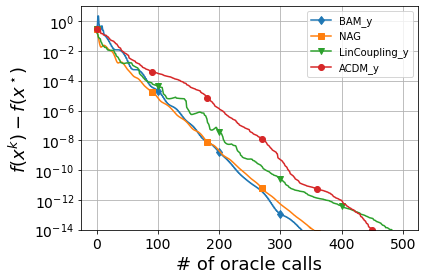

In [1118]:
# plt.plot(func_list_large_D_x[0:4000],label = 'BAM_x')
# plt.plot(func_list_large_D_2_x[0:2000],label = 'BAM_x',marker = 'd', markevery = 100)
# plt.plot(func_list_large_D_y[0:4000],label = 'BAM_y')
plt.plot(func_list_large_D_2_y[0:500],label = 'BAM_y',marker = 'd', markevery = 100)
plt.plot(func_list_large_Nes_x[0:500], label = 'NAG',marker = 's', markevery = 90)
plt.plot(func_list_large_coup_y[0:500], label = 'LinCoupling_y',marker = 'v', markevery = 100)
plt.plot(func_list_large_ACDM_y[0:500], label = 'ACDM_y',marker = 'o', markevery = 90)
plt.grid()
plt.xlabel('# of oracle calls',fontsize=18)
plt.ylabel('$f(x^k) - f(x^\star)$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.ylim(10**(-14),10)
plt.yscale('log')
plt.tight_layout()
plt.savefig('log_001-00-1-upd_y_mm.pdf')

In [1120]:
L

1.567157518045339

In [1121]:
dim

119

In [1122]:
A, b = sklearn.datasets.load_svmlight_file(data_path)

In [1124]:
A.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1125]:
A.shape

(1605, 119)

In [1126]:
mu_x

0.01

In [1127]:
mu_y

0.002